In [4]:
import numpy as np
import matplotlib.pyplot as plt

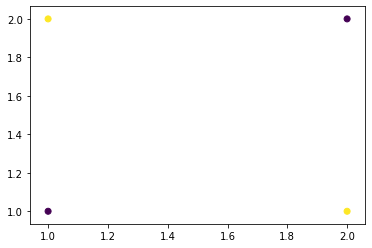

((4, 2), (4,))

In [5]:
X = np.array([[1,1],[2,1],[1,2],[2,2]])#试一下异常的
y = np.array([0,1,1,0,])#.reshape(-1,1)
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()
X.shape, y.shape

In [201]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC,LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

lr = LogisticRegression(C=100)#降低正则化强度
lsvc = LinearSVC()
svc = SVC()
rf = RandomForestClassifier()
mlp = MLPClassifier()

### 绘制决策边界，[参考博客](https://blog.csdn.net/qinhanmin2010/article/details/65692760)
思路就是把一定范围的每个点都上色
1. 限界 
2. meshgrid 生成xy轴
3. ravel 生成
4. np.c_ 
5. contourf绘制等高线，scatter绘制散点

(300, 300) (300, 300)
(90000,)


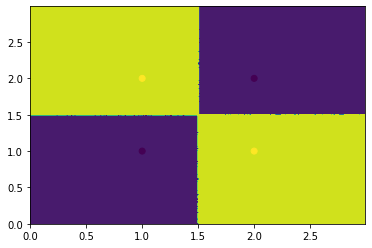

In [195]:
# 设xy轴
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1 #x1->xx
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1 #x2->yy
h = 0.01
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h)) #笛卡尔积？
print(xx.shape, yy.shape)

# 生成Z轴
clf = svc
clf.fit(X, y)
def get_Z(pred_func): #单纯想学一下lambda表达式
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])#都拉成列向量；再拼成一对坐标(x1,x2) 放入分类器得到结果 还是列向量
    print(Z.shape)
    Z = Z.reshape(xx.shape)
    return Z

Z = get_Z(lambda x: clf.predict(x)) #相当于传一个函数
plt.contourf(xx, yy, Z)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

### pytorch实现

In [138]:
X,y

(array([[1, 1],
        [2, 1],
        [1, 2],
        [2, 2]]), array([0, 0, 1, 1]))

0 tensor(0.7576)


C:\Users\Administrator\Anaconda3\lib\site-packages\torch\nn\functional.py:1594: UserWarning: Using a target size (torch.Size([4])) that is different to the input size (torch.Size([4, 1])) is deprecated. Please ensure they have the same size.
  "Please ensure they have the same size.".format(target.size(), input.size()))
C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel\__main__.py:28: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


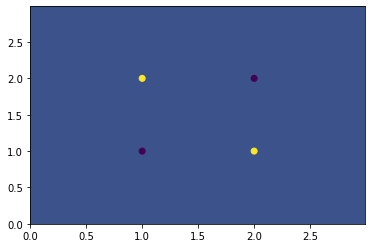

10 tensor(0.7431)


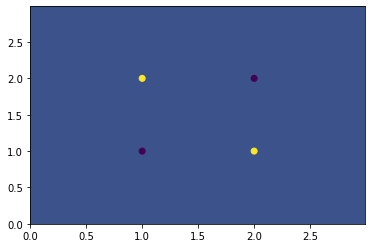

20 tensor(0.7320)


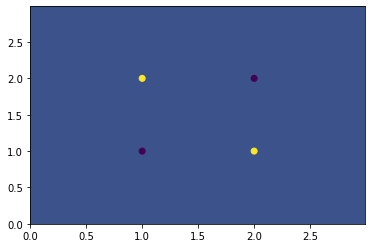

30 tensor(0.7234)


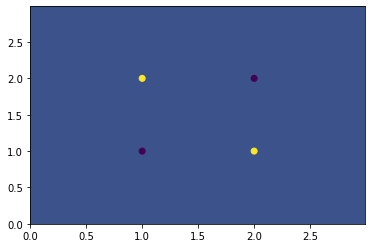

40 tensor(0.7168)


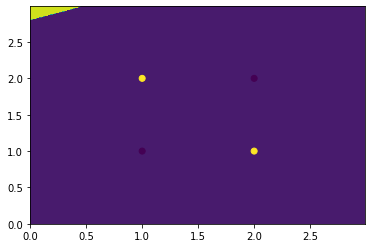

50 tensor(0.7119)


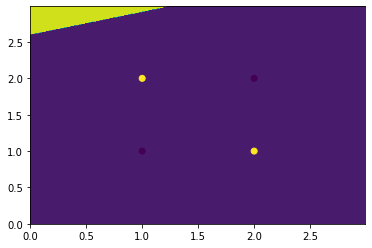

60 tensor(0.7081)


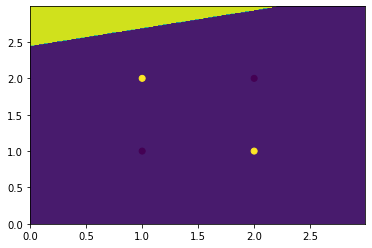

70 tensor(0.7052)


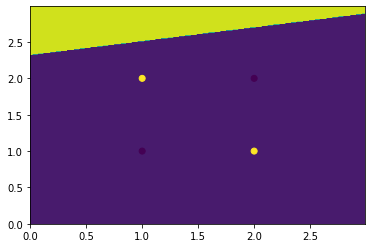

80 tensor(0.7031)


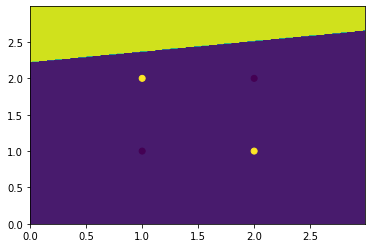

90 tensor(0.7014)


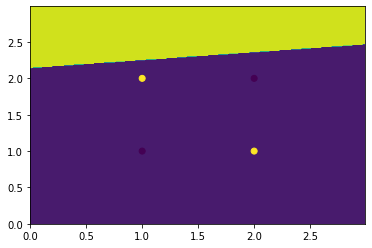

In [204]:
import torch
from torch.autograd import Variable

x_data = Variable(torch.Tensor(X))
y_data = Variable(torch.Tensor(y))

class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.linear = torch.nn.Linear(2, 1) # 2->1
        self.sigmoid = torch.nn.Sigmoid()

    def forward(self, x):
        y_pred = self.sigmoid(self.linear(x))
        return y_pred

model = Model()
criterion = torch.nn.BCELoss()#二分类交叉熵
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
E_POCH = 100

for epoch in range(E_POCH):
    y_pred = model(x_data)
    loss = criterion(y_pred, y_data)
    if epoch % 10 == 0:
        print(epoch, loss.data[0])
        xy = Variable(torch.Tensor(np.c_[xx.ravel(), yy.ravel()]))#转化为Tensor；再都拉成列向量；拼成一对坐标(x1,x2) 放入分类器得到结果 还是列向量
        Z = model.forward(xy).data #得到Z；torch.Size([90000, 1])
        Z = Z.reshape(xx.shape)# torch.Size([300, 300])
        Z[Z > 0.5] = 1
        Z[Z < 0.5] = 0
        plt.contourf(xx, yy, Z)
        plt.scatter(X[:, 0], X[:, 1], c=y)
        plt.show()

    optimizer.zero_grad()#清零
    loss.backward()#反向传播，计算梯度
    optimizer.step()#更新




Variable对Tensor对象进行封装，只需要Variable::data即可取出Tensor，并且Variable还封装了该Tensor的梯度Variable::grad(是个Variable对象)。现在用Variable作为计算图的节点，则通过反向传播自动求得的导数就保存在Variable对象中了。


In [168]:
import numpy as np
import os

def softmax(X):   #softmax函数
    return np.exp(X) / np.sum(np.exp(X))

def train(digits, labels, maxIter = 100, alpha = 0.1):
    W = np.random.uniform(0, 1, (2, 2))
    print(W.shape)
    for iter in range(maxIter):
            for i in range(len(digits)):
                x = digits[i]#.reshape(-1, 1)
                y = np.zeros((2, ))
                y[labels[i]] = 1
                y_ = softmax(np.dot(W, x))
                W -= alpha * (np.dot((y_ - y), x.T))
    return W

W = train(X, y, maxIter=100) #训练

def predict(digit):   #预测函数
    return np.argmax(np.dot(W, digit))   #返回softmax中概率最大的值




Z = predict(np.c_[xx.ravel(), yy.ravel()])
print(Z.shape)
Z = Z.reshape(xx.shape)


Z = get_Z(lambda x: clf.predict(x)) #相当于传一个函数
plt.contourf(xx, yy, Z)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

(2, 2)


ValueError: shapes (2,2) and (90000,2) not aligned: 2 (dim 1) != 90000 (dim 0)